In [432]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [433]:
df=pd.read_csv('heartdisease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [434]:
#why there is are many question marks

In [435]:
df = df.replace('?', np.nan)

In [436]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,NaN,NaN,2
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
3,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
4,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,NaN,NaN,NaN,1
196,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
197,55,1,4,122,223,1,1,100,0,0,NaN,NaN,6,2
198,58,1,4,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,NaN,0


In [437]:
#this is a classification problem
#if we have that many missing data will ml work?  

In [438]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
num           0
dtype: int64

In [439]:
#Lets chcek the value counts of object type columns
for col in df.columns:
    if df[col].dtype=="object":
        print(df[col].value_counts())
        print()

120    16
130    15
140    10
110     9
150     9
160     8
122     6
142     5
134     4
128     4
126     4
144     4
136     4
124     4
170     4
132     3
158     3
152     2
104     2
116     2
154     2
138     2
112     2
155     2
125     2
180     2
96      1
0       1
156     1
172     1
118     1
178     1
146     1
127     1
190     1
106     1
135     1
114     1
102     1
100     1
Name: trestbps, dtype: int64

0      49
258     4
220     4
203     4
223     3
       ..
233     1
292     1
306     1
316     1
384     1
Name: chol, Length: 99, dtype: int64

0    125
1     68
Name: fbs, dtype: int64

120    12
140    12
110     8
130     6
112     6
160     4
118     4
105     4
150     4
128     4
100     4
102     3
84      3
108     3
125     3
122     3
86      3
117     3
135     3
148     3
106     3
180     2
96      2
111     2
129     2
127     2
80      2
98      2
138     2
165     2
119     2
154     2
88      1
93      1
97      1
99      1
107     1
161     1

In [440]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [441]:
df.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
num          int64
dtype: object

In [442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  144 non-null    object
 4   chol      193 non-null    object
 5   fbs       193 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   147 non-null    object
 8   exang     147 non-null    object
 9   oldpeak   144 non-null    object
 10  slope     98 non-null     object
 11  ca        2 non-null      object
 12  thal      34 non-null     object
 13  num       200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [443]:
df = df.apply(pd.to_numeric) 
print(df.dtypes) 

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs         float64
restecg       int64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object


In [444]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,NaN,NaN,2
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,NaN,NaN,NaN,1
196,62,1,1,NaN,139.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
197,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,NaN,NaN,6.0,2
198,58,1,4,NaN,385.0,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,0


In [445]:
df.oldpeak.value_counts()

 0.0    40
 2.0    25
 1.5    21
 1.0    18
 3.0    13
 2.5     9
 0.5     7
 4.0     4
 1.3     2
 1.7     1
 0.8     1
 1.6     1
 3.5     1
-0.5     1
Name: oldpeak, dtype: int64

In [446]:
df.num.value_counts()

1    56
0    51
3    42
2    41
4    10
Name: num, dtype: int64

In [447]:
df.slope.value_counts()

2.0    53
3.0    29
1.0    16
Name: slope, dtype: int64

In [448]:
df.ca.value_counts()

0.0    2
Name: ca, dtype: int64

In [449]:
#we should drop this column no data is there to be exact

In [450]:
#lets try to fill in data according to the column type

In [451]:
#trestbps     object
#filling data
#trestbps-The person's resting blood pressure (mm Hg on admission to the hospital)

#it is in object type we have to convert it into numeric values

df['trestbps']=df['trestbps'].fillna(df['trestbps'].mean())

#chol: The person's cholesterol measurement in mg/dl
df['chol']=df['chol'].fillna(df['chol'].mean())

#fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) 
#it is sort of classification type data, even though we forced the whole dataset as numerical but lets use mode or median
df['fbs']=df['fbs'].fillna(df['fbs'].median())

#thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect) classification type so mode is used
df['thal']=df['thal'].fillna(df['thal'].median())

#exang: Exercise induced angina (1 = yes; 0 = no)
df['exang']=df['exang'].fillna(df['exang'].median())

#oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
#confused about the type here lets use median
df['oldpeak']=df['oldpeak'].fillna(df['oldpeak'].median())

df.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach      53
exang         0
oldpeak       0
slope       102
ca          198
thal          0
num           0
dtype: int64

In [452]:
#thalach: The person's maximum heart rate achieved
df['thalach']=df['thalach'].fillna(df['thalach'].mean())

#slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
df['slope']=df['slope'].fillna(df['slope'].median())

#ca: The number of major vessels (0-3)


In [453]:
#filling it this way i think it will make the model more bias

In [454]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca          198
thal          0
num           0
dtype: int64

In [455]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,2.0,200.000000,200.000000
mean,59.350000,0.970000,3.505000,133.763889,178.746114,0.340000,0.735000,122.795918,0.740000,1.371000,2.065000,0.0,6.880000,1.520000
std,7.811697,0.171015,0.795701,18.257507,112.011633,0.474898,0.683455,18.835692,0.439735,0.941216,0.471046,0.0,0.589353,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,1.000000,0.0,3.000000,0.000000
25%,55.000000,1.000000,3.000000,125.750000,129.250000,0.000000,0.000000,112.000000,0.000000,1.000000,2.000000,0.0,7.000000,0.000000
50%,60.000000,1.000000,4.000000,133.763889,214.000000,0.000000,1.000000,122.795918,1.000000,1.500000,2.000000,0.0,7.000000,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.500000,1.000000,1.000000,130.000000,1.000000,2.000000,2.000000,0.0,7.000000,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,3.000000,0.0,7.000000,4.000000


In [456]:
#outlier are present(trestbps,chol,thalach) gap between 75% and max

In [457]:
#standard deviation high in some cases like  chol #

In [458]:
#skewess may be present in case of chol

In [459]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,0.034230,-0.038280,0.181584,0.066972,0.135728,0.002400,-0.149949,0.129027,0.156191,0.107135,NaN,0.106313,0.287289
sex,0.034230,1.000000,0.038036,0.012585,-0.096150,-0.059400,0.060621,-0.001592,0.029402,0.100713,0.086709,NaN,-0.035898,0.147470
cp,-0.038280,0.038036,1.000000,0.074638,0.065818,-0.044416,0.034790,-0.123597,0.089904,0.015627,0.059460,NaN,-0.009430,0.168210
trestbps,0.181584,0.012585,0.074638,1.000000,0.150192,0.192337,0.092042,-0.013046,0.205900,0.113735,0.083459,NaN,0.068807,0.141719
chol,0.066972,-0.096150,0.065818,0.150192,1.000000,0.173396,0.024257,-0.041209,0.117050,0.011490,0.043363,NaN,-0.037535,0.076444
fbs,0.135728,-0.059400,-0.044416,0.192337,0.173396,1.000000,0.170616,0.037972,-0.176144,-0.096999,-0.009435,NaN,-0.033036,0.048940
restecg,0.002400,0.060621,0.034790,0.092042,0.024257,0.170616,1.000000,0.012348,-0.063203,-0.102623,-0.039881,NaN,0.020460,-0.032800
thalach,-0.149949,-0.001592,-0.123597,-0.013046,-0.041209,0.037972,0.012348,1.000000,-0.070142,0.177591,-0.107241,NaN,-0.177857,-0.079077
exang,0.129027,0.029402,0.089904,0.205900,0.117050,-0.176144,-0.063203,-0.070142,1.000000,0.315578,0.106259,NaN,0.150467,0.206541
oldpeak,0.156191,0.100713,0.015627,0.113735,0.011490,-0.096999,-0.102623,0.177591,0.315578,1.000000,0.284230,NaN,0.166723,0.366526


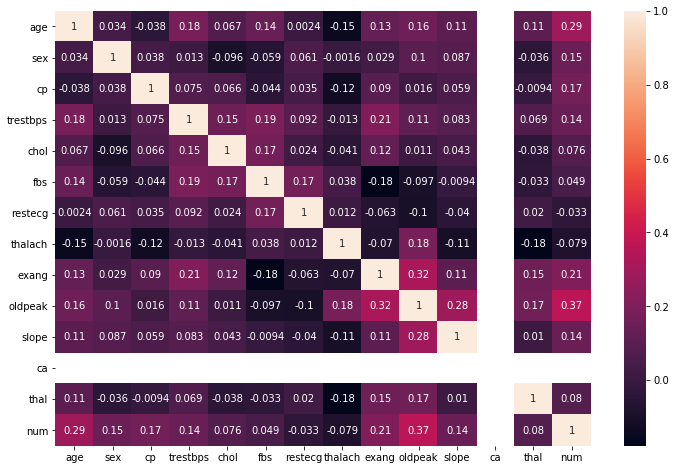

In [460]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [461]:
#lets drop ca--->almost no data is present in ca column
df.drop(['ca'], axis=1, inplace=True)

In [462]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
0,63,1,4,140.000000,260.0,0.0,1,112.000000,1.0,3.0,2.0,7.0,2
1,44,1,4,130.000000,209.0,0.0,1,127.000000,0.0,0.0,2.0,7.0,0
2,60,1,4,132.000000,218.0,0.0,1,140.000000,1.0,1.5,3.0,7.0,2
3,55,1,4,142.000000,228.0,0.0,1,149.000000,1.0,2.5,1.0,7.0,1
4,66,1,3,110.000000,213.0,1.0,2,99.000000,1.0,1.3,2.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.000000,333.0,1.0,1,154.000000,0.0,0.0,2.0,7.0,1
196,62,1,1,133.763889,139.0,0.0,1,122.795918,1.0,1.5,2.0,7.0,0
197,55,1,4,122.000000,223.0,1.0,1,100.000000,0.0,0.0,2.0,6.0,2
198,58,1,4,133.763889,385.0,1.0,2,122.795918,1.0,1.5,2.0,7.0,0


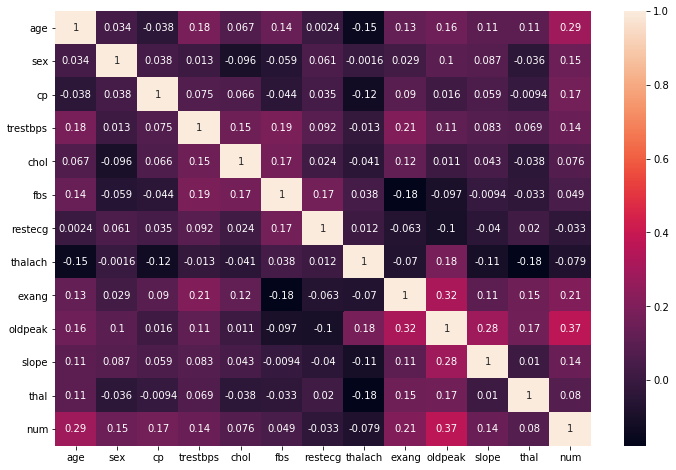

In [463]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

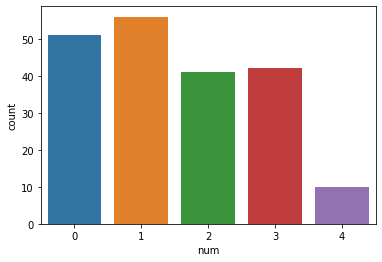

In [464]:
sns.countplot(x="num", data=df) 

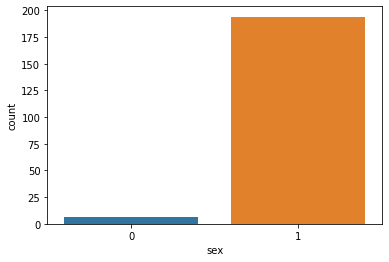

In [465]:
sns.countplot(x='sex', data=df)

In [466]:
#0=female,male=1

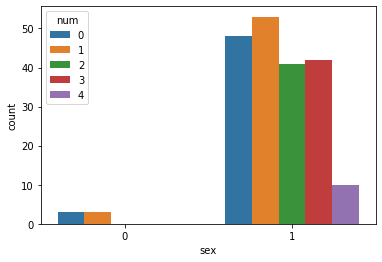

In [467]:

sns.countplot(x='sex',hue="num",data=df) 

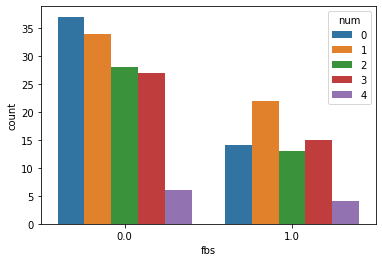

In [468]:
sns.countplot(x='fbs',hue="num",data=df) 
#> 120 mg/dl, 1 = true; 0 = false

In [469]:
#People having fps < 120 have more chance of having Heart Disease than people having fps >12o

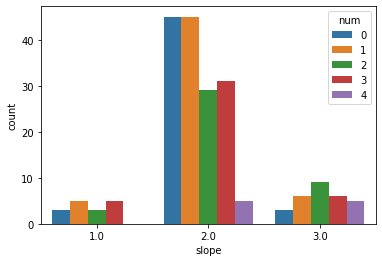

In [470]:
sns.countplot(x='slope',hue="num",data=df) 

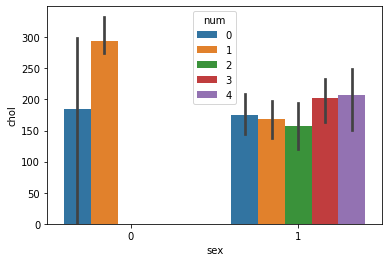

In [471]:
sns.barplot(x='sex',y="chol",hue= 'num',data=df) 

In [472]:
#0=female,1=male
#Female have higher cholestrol level than Men. Chances of Heart Diseases kind of decreases with decrease in Cholestrol level.

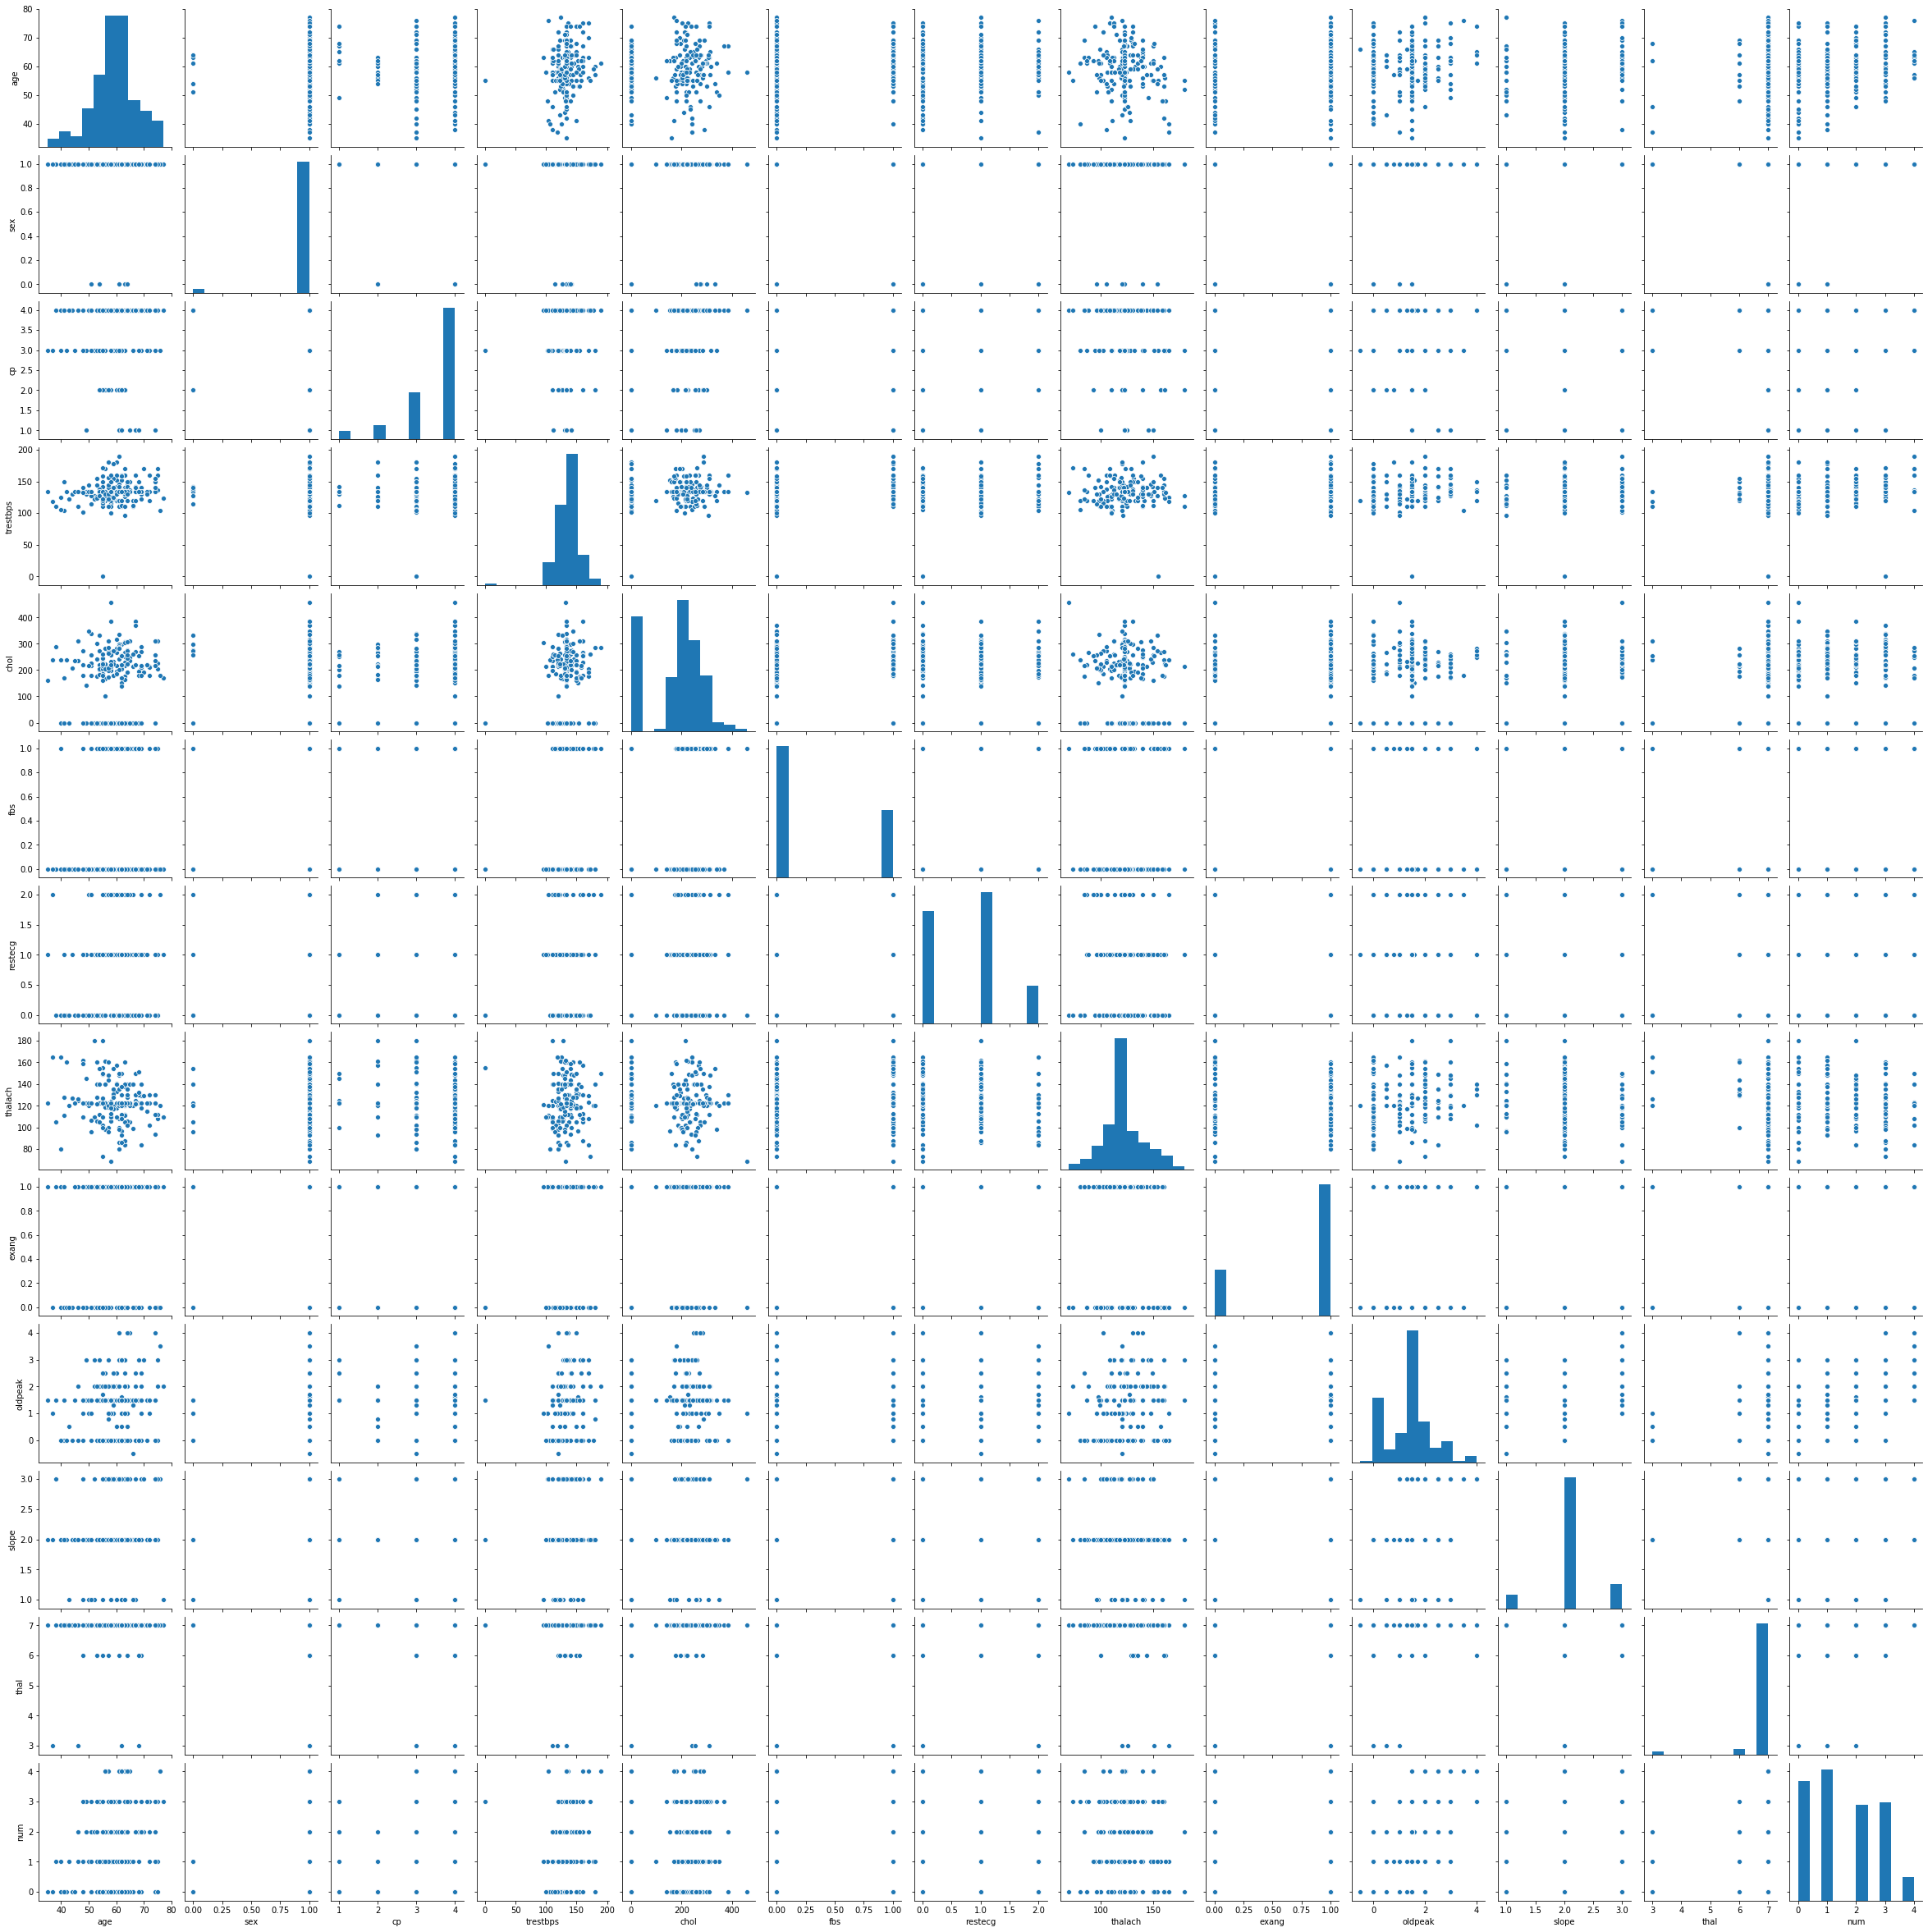

In [473]:
sns.pairplot(df)
plt.show()

In [474]:
#skewness

In [475]:
df.skew()

age        -0.404091
sex        -5.552105
cp         -1.648734
trestbps   -1.511363
chol       -0.571879
fbs         0.680636
restecg     0.391463
thalach     0.148515
exang      -1.102593
oldpeak     0.259052
slope       0.210521
thal       -5.920627
num         0.297393
dtype: float64

In [476]:
#Lets treat the skewness
import numpy as np
for index in df.skew().index:
    if df.skew().loc[index]>0.5:
        df[index]=np.cbrt(df[index])
    if df.skew().loc[index]<-0.5:
        df[index]=np.cbrt(df[index])

df.skew()

age        -0.404091
sex        -5.552105
cp         -2.168404
trestbps   -9.555472
chol       -1.118785
fbs         0.680636
restecg     0.391463
thalach     0.148515
exang      -1.102593
oldpeak     0.259052
slope       0.210521
thal       -6.202416
num         0.297393
dtype: float64

In [477]:
#Removing outliers

In [478]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z
threshold=3
print(np.where(z>3))

(array([ 12,  24,  33,  51,  66,  70,  72,  76,  79,  96,  97, 126, 128,
       131, 133, 137, 171, 189, 190, 194, 195, 196], dtype=int64), array([11,  7,  3,  1,  2,  7,  2,  2,  1,  0,  2,  1,  1,  2,  2,  2, 11,
       11,  1, 11,  1,  2], dtype=int64))


In [479]:
dfnew=df[(z<3).all(axis=1)]

In [480]:
df.shape,dfnew.shape

((200, 13), (178, 13))

In [481]:
dfx=dfnew.iloc[:,0:12]
y=dfnew['num']

In [482]:
dfx

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal
0,63,1.0,1.587401,5.192494,6.382504,0.0,1,112.000000,1.0,3.0,2.0,1.912931
1,44,1.0,1.587401,5.065797,5.934472,0.0,1,127.000000,0.0,0.0,2.0,1.912931
2,60,1.0,1.587401,5.091643,6.018462,0.0,1,140.000000,1.0,1.5,3.0,1.912931
3,55,1.0,1.587401,5.217103,6.109115,0.0,1,149.000000,1.0,2.5,1.0,1.912931
4,66,1.0,1.442250,4.791420,5.972093,1.0,2,99.000000,1.0,1.3,2.0,1.912931
...,...,...,...,...,...,...,...,...,...,...,...,...
192,53,1.0,1.587401,5.241483,6.694330,1.0,1,128.000000,1.0,1.5,2.0,1.912931
193,62,1.0,1.587401,5.406120,5.539658,0.0,1,138.000000,1.0,0.0,2.0,1.912931
197,55,1.0,1.587401,4.959676,6.064127,1.0,1,100.000000,0.0,0.0,2.0,1.817121
198,58,1.0,1.587401,5.114223,7.274786,1.0,2,122.795918,1.0,1.5,2.0,1.912931


In [483]:
y

0      2
1      0
2      2
3      1
4      0
      ..
192    3
193    1
197    2
198    0
199    1
Name: num, Length: 178, dtype: int64

In [484]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(dfx)
newx=sc.transform(dfx)
newx=pd.DataFrame(newx,columns=dfx.columns)

In [485]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(newx,y,test_size=0.20,random_state=42)

In [486]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')


model=[LogisticRegression(), GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:
0.25
[[2 1 1 0 0]
 [4 2 1 2 0]
 [2 6 3 1 0]
 [1 3 2 2 0]
 [1 1 1 0 0]]
              precision    recall  f1-score   support

           0       0.20      0.50      0.29         4
           1       0.15      0.22      0.18         9
           2       0.38      0.25      0.30        12
           3       0.40      0.25      0.31         8
           4       0.00      0.00      0.00         3

    accuracy                           0.25        36
   macro avg       0.23      0.24      0.22        36
weighted avg       0.27      0.25      0.25        36



Accuracy score of GaussianNB() is:
0.1388888888888889
[[1 0 0 0 3]
 [1 1 1 0 6]
 [0 2 1 0 9]
 [1 0 0 0 7]
 [0 1 0 0 2]]
              precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.25      0.11      0.15         9
           2       0.50      0.08      0.14        12
           3       0.00      0.00      0.00         8
    

In [487]:
#Lets use SVM
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
svc1=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc1, parameters, cv=5,scoring="accuracy")
clf.fit(newx,y)
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [488]:
x_train, x_test, y_train, y_test = train_test_split(newx, y,random_state = 42,test_size=0.20,stratify=y)
svc=SVC(kernel="rbf",C=1)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

In [489]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred,average='micro'))
print("classification report \n",classification_report(y_test,y_pred))
print("Accuracy score: ",accuracy_score(y_test,y_pred))

Confusion matrix 
 [[4 4 0 0 0]
 [2 5 2 1 0]
 [2 2 1 3 0]
 [3 2 0 3 0]
 [0 0 1 1 0]]
f1 score is :  0.3611111111111111
classification report 
               precision    recall  f1-score   support

           0       0.36      0.50      0.42         8
           1       0.38      0.50      0.43        10
           2       0.25      0.12      0.17         8
           3       0.38      0.38      0.38         8
           4       0.00      0.00      0.00         2

    accuracy                           0.36        36
   macro avg       0.27      0.30      0.28        36
weighted avg       0.33      0.36      0.33        36

Accuracy score:  0.3611111111111111


In [490]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(svc,newx,y,cv=5,scoring="accuracy").mean())

0.3988888888888889


In [426]:
#so we choose svc as our final model
import joblib
joblib.dump(svc,'heart_disease.obj')

['heart_disease.obj']